# Google Trends API Data
## - Introduction:

#### Primary Objective:
The main goal of collecting Google Trends data for Saudi Arabia is to analyze the interest in social media and mental health across the country over specific time periods between 2020 and 2024. This analysis will help to understand how interest in social media evolves and its potential impact on mental health in Saudi Arabia over time.

#### Secondary Objectives:

##### - Trend Analysis Over Time:
We aim to determine whether there is an increase or decrease in interest in social media and mental health over the years in Saudi Arabia. This will help identify any emerging patterns or changes in public concern related to these topics.

##### - Drawing Conclusions About the Potential Impact of Social Media:
Based on the data, we will be able to form preliminary conclusions about the relationship between increased social media usage and the level of interest in mental health in the country. This may offer insights into how digital engagement correlates with mental health awareness or concern within the Saudi cultural context.

## - Source of Dataset:
The dataset was sourced from Google Trends, accessible via the following link: [Google Trends.](https://trends.google.com/trends/)

The data was retrieved programmatically using the 'pytrends' library, which provides a Python interface to interact with the Google Trends API. 

## - Data Collection steps:

#### 1. Installation
Before running the script to collect data from Google Trends, the necessary Python library, pytrends, had to be installed. This was done using the command-line interface (CMD) on the computer. To install the pytrends library, the following command was executed:

In [ ]:
pip install pytrends

This command utilizes Python’s package manager, pip, to download and install the pytrends library. The CMD (Command Prompt) was used to ensure that the library was available in the environment, allowing the script to make requests to Google Trends and retrieve the required data.

Once the installation was successfully completed, the script was ready to run without any issues related to missing dependencies.

#### 2. Importing Necessary Libraries

In [29]:
from pytrends.request import TrendReq
import pandas as pd
import time
import random
from pytrends.exceptions import ResponseError

In this code, we imported the necessary libraries and tools for working with Google Trends and data. Here's a breakdown of what we did:

1. from pytrends.request import TrendReq:
We imported TrendReq from pytrends, allowing us to access Google Trends data. This is the main object used to send search queries to Google Trends.
2. import pandas as pd:
We imported Pandas, a popular data analysis library, to organize and manipulate the data using DataFrames for easy analysis.
3. import time:
We imported time to manage time-based functions like delaying execution between requests to avoid overwhelming Google with too many queries at once.
4. import random:
We imported random to introduce random delays between requests, ensuring that our requests appear natural and avoid triggering any rate limits.
5. from pytrends.exceptions import ResponseError:
We imported ResponseError to handle potential errors from Google Trends, allowing us to retry requests or manage failures gracefully.

#### 3. Setting up Google Trends Request

In [7]:
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10, 25))

we are initializing a TrendReq object from the pytrends library with some specific parameters:

- hl='en-US':

This sets the language for the Google Trends results to English (United States). The hl parameter stands for "host language."
- tz=360:

This sets the time zone to UTC+6 hours (360 minutes). Time zones are specified in minutes from UTC. For example, 0 is UTC, and 360 corresponds to UTC+6.
- timeout=(10, 25):

This sets a timeout for the connection. It consists of two values:
10 seconds for the connection to be established.
25 seconds for reading the data once connected.

These timeouts help ensure that the code doesn't hang indefinitely if there's a slow response from Google Trends.


By creating this pytrends object, we are now ready to send search queries to Google Trends with the specified language, time zone, and connection settings.

#### 4. Defining Keyword Groups

In [29]:
keywords_group1 = [
    "social media",
    "mental health",
    "depression and social media",
    "anxiety and social media"
]

keywords_group2 = [
    "insomnia and social media",
    "stress and social media",
    "addiction and social media",
]

keywords_group3 = [
    "Instagram",
    "Twitter",
    "Platform X",
    "Facebook",
]

keywords_group4 = [
    "Snapchat",
    "TikTok",
    "LinkedIn",
    "YouTube",
    "WhatsApp"
]


This section of the code organizes the keywords into four distinct groups. These keywords will be used for Google Trends data analysis to track public interest in social media platforms and their potential impact on mental health. 
<br>
The keywords were divided into two groups for several practical reasons:
<br>
- **Reduce API request load**: 
By splitting the keywords into smaller groups, we can perform multiple API calls without overloading the system, ensuring smooth data retrieval.

- **Data Accuracy**: 
By splitting the terms, we can ensure more accurate and focused data collection. Querying too many terms at once can dilute the relevance of the data, especially when comparing distinct platforms or topics.

This separation makes it easier to conduct a detailed analysis of trends for both social media platforms and mental health topics without overwhelming the system.







#### 5. Specifying Time Ranges for Each Year

In [24]:
years = {
    '2020': '2020-01-01 2020-12-31',
    '2021': '2021-01-01 2021-12-31',
    '2022': '2022-01-01 2022-12-31',
    '2023': '2023-01-01 2023-12-31',
    '2024': '2024-01-01 2024-12-31'
}

The dictionary years specifies the time range for each year from 2020 to 2024 because the Google Trends API does not allow for direct yearly data retrieval. Instead, the API requires precise date ranges that include specific months and days. By defining each year with exact start and end dates (from January 1st to December 31st), we can simulate yearly data collection.

This step was necessary because the API only accepts data requests with monthly and daily granularity, not by year. Therefore, creating these specific date ranges ensures that we can retrieve data for an entire year without gaps.

#### 6. Function to Fetch Google Trends Data 

In [30]:
countries = ['SA']
def fetch_data_with_retry(country, keywords, year, timeframe, retries=3):
    for attempt in range(retries):
        try:
            pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo=country, gprop='')
            data = pytrends.interest_over_time()
            return data
        except ResponseError as e:
            if "429" in str(e):
                print(f"Rate limit exceeded for {country}, retrying... ({attempt + 1}/{retries})")
                time.sleep(60 * (attempt + 1))  
            else:
                print(f"Other error occurred: {e}")
                break
        except Exception as e:
            print(f"Error: {e}")
            break
    return pd.DataFrame() 

In this function, `fetch_data_with_retry`, we're implementing a method to retrieve Google Trends data with a built-in retry mechanism in case errors occur, particularly when the rate limit is exceeded. Here's a summary of the function:

- **Parameters**:
  - `country`: The country code for which we want to retrieve data.
  - `keywords`: A list of keywords to search for (e.g., ['social media', 'mental health']).
  - `year`: The year of interest (used to define the timeframe).
  - `timeframe`: The period for the query (e.g., '2020-01-01 2021-01-01').
  - `retries`: The number of attempts to retry fetching the data if the request fails (default is 3 retries).

- **Function Workflow**:
  - **for attempt in range(retries)**:
    This loop allows the function to try retrieving the data up to the specified number of retries if an error occurs.
  - **pytrends.build_payload**:
    This is where the search query is sent to Google Trends, using the given keywords, country, and timeframe.
  - **pytrends.interest_over_time()**:
    Once the payload is built, this function retrieves the "interest over time" data from Google Trends. If successful, the data is returned.
  - **except ResponseError**:
    This block specifically checks if the error is related to exceeding the rate limit (error code 429). If such an error occurs, a message is printed, and the function waits before retrying. The delay increases with each retry attempt.
  - **except Exception**:
    Any other errors (not related to rate limits) are caught here, printed, and the process stops.
  - **return pd.DataFrame()**:
    If all retry attempts fail, or another error occurs, the function returns an empty DataFrame.

- **Purpose**:
  The main goal of this function is to ensure that data retrieval continues even when Google Trends imposes rate limits (error 429), by retrying the request with increasing wait times. It also handles other errors gracefully, making the overall process of fetching data more reliable, especially when working with frequent or large queries.

#### 8. Function to fetch data for a country

In [31]:

def fetch_data_for_country(country, keywords_group):
    country_data = pd.DataFrame()
    for year, timeframe in years.items():
        for keywords in keywords_group:
            print(f"Fetching data for {year} with keywords '{keywords}' in {country}...")
            data = fetch_data_with_retry(country, [keywords], year, timeframe)
            if not data.empty:
                data['Year'] = year
                data['Country'] = country
                country_data = pd.concat([country_data, data], axis=0)
            else:
                print(f"No data available for {year} with keywords '{keywords}' in {country}")
            time.sleep(random.uniform(5, 15))  
    return country_data

The `fetch_data_for_country` function is designed to retrieve Google Trends data for a specified country and a group of keywords over a series of years. It combines the results into a single DataFrame for easy analysis.

### Parameters
- **country**: A string representing the country code (e.g., 'SA' for Saudi Arabia) from which to fetch data.
- **keywords_group**: A list of groups of keywords (e.g., social media and mental health terms) to search for in Google Trends.

### Function Workflow
1. **Initialization**:
   - `country_data`: An empty DataFrame to hold the collected data for the specified country.

2. **Iterating Over Years**:
   - The function iterates through the `years` dictionary.
   - For each year and its corresponding timeframe, the function processes each group of keywords.

3. **Data Fetching**:
   - Inside the nested loop, the function prints a message indicating the year, keywords, and country for which data is being fetched.
   - It calls the `fetch_data_with_retry` function to retrieve the Google Trends data. If the data is successfully fetched and not empty:
     - It adds the current year and country as new columns to the data.
     - The new data is concatenated to the `country_data` DataFrame.
   - If no data is available for the specified year and keywords, it prints a message to inform the user.

4. **Random Sleep**:
   - After each data retrieval attempt, the function waits for a random amount of time (between 5 to 15 seconds) to avoid hitting the Google Trends rate limit.

5. **Return Value**:
   - Finally, the function returns the `country_data` DataFrame containing all the fetched data for the specified country.

#### 9. Fetch data from all keyword groups

In [32]:

all_data = pd.DataFrame()
all_data = pd.concat([
    fetch_data_for_country(countries[0], keywords_group1),
    fetch_data_for_country(countries[0], keywords_group2),
    fetch_data_for_country(countries[0], keywords_group3),
    fetch_data_for_country(countries[0], keywords_group4)
], ignore_index=True)


Fetching data for 2020 with keywords 'social media' in SA...
Fetching data for 2020 with keywords 'mental health' in SA...
Fetching data for 2020 with keywords 'depression and social media' in SA...
No data available for 2020 with keywords 'depression and social media' in SA
Fetching data for 2020 with keywords 'anxiety and social media' in SA...
No data available for 2020 with keywords 'anxiety and social media' in SA
Fetching data for 2021 with keywords 'social media' in SA...
Fetching data for 2021 with keywords 'mental health' in SA...
Fetching data for 2021 with keywords 'depression and social media' in SA...
Fetching data for 2021 with keywords 'anxiety and social media' in SA...
No data available for 2021 with keywords 'anxiety and social media' in SA
Fetching data for 2022 with keywords 'social media' in SA...
Fetching data for 2022 with keywords 'mental health' in SA...
Fetching data for 2022 with keywords 'depression and social media' in SA...
Fetching data for 2022 with keyw

c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'mental health' in SA...


c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'depression and social media' in SA...
No data available for 2024 with keywords 'depression and social media' in SA
Fetching data for 2024 with keywords 'anxiety and social media' in SA...
No data available for 2024 with keywords 'anxiety and social media' in SA
Fetching data for 2020 with keywords 'insomnia and social media' in SA...
No data available for 2020 with keywords 'insomnia and social media' in SA
Fetching data for 2020 with keywords 'stress and social media' in SA...
No data available for 2020 with keywords 'stress and social media' in SA
Fetching data for 2020 with keywords 'addiction and social media' in SA...
No data available for 2020 with keywords 'addiction and social media' in SA
Fetching data for 2021 with keywords 'insomnia and social media' in SA...
Fetching data for 2021 with keywords 'stress and social media' in SA...
No data available for 2021 with keywords 'stress and social media' in SA
Fetching data for 2021 with keywords

c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'Twitter' in SA...


c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'Platform X' in SA...


c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'Facebook' in SA...


c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2020 with keywords 'Snapchat' in SA...
Fetching data for 2020 with keywords 'TikTok' in SA...
Fetching data for 2020 with keywords 'LinkedIn' in SA...
Fetching data for 2020 with keywords 'YouTube' in SA...
Fetching data for 2020 with keywords 'WhatsApp' in SA...
Fetching data for 2021 with keywords 'Snapchat' in SA...
Fetching data for 2021 with keywords 'TikTok' in SA...
Fetching data for 2021 with keywords 'LinkedIn' in SA...
Fetching data for 2021 with keywords 'YouTube' in SA...
Fetching data for 2021 with keywords 'WhatsApp' in SA...
Fetching data for 2022 with keywords 'Snapchat' in SA...
Fetching data for 2022 with keywords 'TikTok' in SA...
Fetching data for 2022 with keywords 'LinkedIn' in SA...
Fetching data for 2022 with keywords 'YouTube' in SA...
Fetching data for 2022 with keywords 'WhatsApp' in SA...
Fetching data for 2023 with keywords 'Snapchat' in SA...
Fetching data for 2023 with keywords 'TikTok' in SA...
Fetching data for 2023 with keywords 'Link

c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'TikTok' in SA...


c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'LinkedIn' in SA...


c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'YouTube' in SA...


c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Fetching data for 2024 with keywords 'WhatsApp' in SA...


c:\Users\sra28\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)



   - An empty DataFrame named `all_data` is created to hold the combined data from all keyword groups.
   - The `pd.concat` function is used to combine the results from four separate calls to the `fetch_data_for_country` function. Each call fetches data for a specific group of keywords defined earlier.
   - The `countries[0]` expression accesses the first country in the `countries` list (which contains only 'SA' in this context).
   - The `ignore_index=True` parameter ensures that the index of the resulting DataFrame is reset, providing a continuous index across all combined data.

#### 10. Exporting to CSV:

In [33]:

if not all_data.empty:
    yearly_data = all_data.groupby(['Year', 'Country']).sum().reset_index()
    yearly_data['date'] = yearly_data['Year']
    selected_columns = ['date', 'Year', 'Country'] + all_data.columns.difference(['Year', 'Country']).tolist()
    yearly_data = yearly_data[selected_columns]
    print(yearly_data.head())

    yearly_data.to_csv("APIGoogleTrends_data_SA.csv", index=False)
else:
    print("No data was collected.")

   date  Year Country  Facebook  Instagram  LinkedIn  Platform X  Snapchat  \
0  2020  2020      SA    3947.0     4307.0    4010.0         0.0    4104.0   
1  2021  2021      SA    3976.0     4502.0    4026.0         0.0    2059.0   
2  2022  2022      SA    4629.0     4031.0    4022.0         0.0    3129.0   
3  2023  2023      SA    4574.0     4192.0    4189.0       187.0    3441.0   
4  2024  2024      SA    2692.0     3271.0    3233.0       143.0    3483.0   

   TikTok  Twitter  WhatsApp  YouTube  addiction and social media  \
0  3096.0   3927.0    4299.0   4312.0                         0.0   
1  3187.0   4016.0    3637.0   4616.0                         0.0   
2  3709.0   3996.0    4123.0   4571.0                         0.0   
3  4181.0   3912.0    4540.0   4634.0                       100.0   
4  3062.0   3253.0    3069.0   3729.0                         0.0   

   depression and social media  insomnia and social media  isPartial  \
0                          0.0              

## - Data Organization and Preparation

In [31]:


df = pd.read_csv('APIGoogleTrends_data_SA.csv')

df['Twitter(X)'] = df['Twitter'].fillna(0) + df['Platform X'].fillna(0)

df.drop(columns=['Twitter', 'Platform X', 'date'], inplace=True)  

new_order = [
    'Year', 
    'Country',
    'mental health', 
    'social media',  
    'Facebook', 
    'Instagram', 
    'LinkedIn', 
    'Snapchat', 
    'TikTok', 
    'WhatsApp', 
    'YouTube',
    'Twitter(X)',
    'addiction and social media', 
    'depression and social media', 
    'insomnia and social media', 
    'isPartial'
]


df = df[new_order]

df.to_csv('APIGoogleTrends_data_SA(1).csv', index=False)

print(df)


   Year Country  mental health  social media  Facebook  Instagram  LinkedIn  \
0  2020      SA         2014.0        4123.0    3947.0     4307.0    4010.0   
1  2021      SA         2337.0        3059.0    3976.0     4502.0    4026.0   
2  2022      SA         2075.0        4187.0    4629.0     4031.0    4022.0   
3  2023      SA         2126.0        4234.0    4574.0     4192.0    4189.0   
4  2024      SA         2506.0        3338.0    2692.0     3271.0    3233.0   

   Snapchat  TikTok  WhatsApp  YouTube  Twitter(X)  \
0    4104.0  3096.0    4299.0   4312.0      3927.0   
1    2059.0  3187.0    3637.0   4616.0      4016.0   
2    3129.0  3709.0    4123.0   4571.0      3996.0   
3    3441.0  4181.0    4540.0   4634.0      4099.0   
4    3483.0  3062.0    3069.0   3729.0      3396.0   

   addiction and social media  depression and social media  \
0                         0.0                          0.0   
1                         0.0                        100.0   
2             


1. **Merging the "Twitter" and "Platform X" Columns**:
   - **Reason**: Twitter has been rebranded as "X," meaning that having two separate columns for the same platform is unnecessary duplication. By merging the two columns into one named `Twitter(X)`, we ensure that all data related to this platform is consolidated and avoids redundancy.

2. **Dropping the Original "Twitter" and "Platform X" Columns**:
   - **Reason**: After merging the data into the `Twitter(X)` column, the original "Twitter" and "Platform X" columns are no longer needed and would only lead to unnecessary repetition. Therefore, these columns are dropped to keep the dataset clean and focused.

3. **Dropping the "date" Column**:
   - **Reason**: We already have a "Year" column, which contains the annual data. The "date" column may contain more granular information (like day or month), but for this analysis, we are focusing on yearly data. Keeping both columns would be redundant, so the "date" column is removed to simplify the dataset.

4. **Reordering the Columns**:
   - **Reason**: The columns are reordered to create a logical structure, with time-related columns like "Year" first, followed by other relevant categories such as mental health and social media. This organization enhances readability and makes the data easier to analyze.

### Objective of These Steps:
- **Eliminate Redundancy**: Combining the "Twitter" and "Platform X" columns into one.
- **Simplify Data**: Removing unnecessary columns like "date" when "Year" is sufficient.
- **Improve Data Organization**: Creating a well-structured dataset that is easier to interpret and analyze for future tasks.

______________________________________________________

# Advanced exploratory data analysis (EDA)

At this stage of my analysis, I will focus on exploring the data I collected from **Google Trends** through Exploratory Data Analysis (EDA). My goal is to gain a deep understanding of the structure, quality, and content of the data, which will help me identify patterns and relationships between variables. This step is crucial for properly preparing the data before I conduct more advanced analyses.

### Analysis Steps:

1. **Structure Analysis:** I will explore the overall shape of the Google Trends dataset, including the number of rows and columns, and examine the data types used in each column, such as time series and trend values.
  
2. **Quality Analysis:** I will check for any missing or duplicated values in the Google Trends data and address any unwanted entries that may affect my analysis.

3. **Content Analysis:** I will dive deep into the values and variables within the Google Trends dataset, examining the relationships between them using statistical analysis and graphical visualizations to illustrate patterns and trends.

## Sample Data review

In [2]:
import pandas as pd
API_data = pd.read_csv('APIGoogleTrends_data_SA(1).csv')


print("Sample Data:")
print(API_data.head())

Sample Data:
   Year Country  mental health  social media  Facebook  Instagram  LinkedIn  \
0  2020      SA         2014.0        4123.0    3947.0     4307.0    4010.0   
1  2021      SA         2337.0        3059.0    3976.0     4502.0    4026.0   
2  2022      SA         2075.0        4187.0    4629.0     4031.0    4022.0   
3  2023      SA         2126.0        4234.0    4574.0     4192.0    4189.0   
4  2024      SA         2506.0        3338.0    2692.0     3271.0    3233.0   

   Snapchat  TikTok  WhatsApp  YouTube  Twitter(X)  \
0    4104.0  3096.0    4299.0   4312.0      3927.0   
1    2059.0  3187.0    3637.0   4616.0      4016.0   
2    3129.0  3709.0    4123.0   4571.0      3996.0   
3    3441.0  4181.0    4540.0   4634.0      4099.0   
4    3483.0  3062.0    3069.0   3729.0      3396.0   

   addiction and social media  depression and social media  \
0                         0.0                          0.0   
1                         0.0                        100.0   
2

## 1. Structure Investigation

We will first take a look at the overall structure of the dataset to indicate how many rows and columns it contains.

In [33]:
API_data.shape

(5, 16)

It becomes clear that this dataset contains 5 samples and 16 features. By 'samples,' we mean the number of rows, where each sample represents an individual case with values for 16 different features (or columns) in the dataset.

In [34]:

pd.value_counts(API_data.dtypes)

C:\Users\sra28\AppData\Local\Temp\ipykernel_15364\2505727884.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(API_data.dtypes)


float64    13
int64       2
object      1
Name: count, dtype: int64

This output shows the data types of the columns in the API_data DataFrame and how many columns belong to each type:

There are 13 columns with the data type float64, which typically represent numerical values with decimal points (floating-point numbers).<br>
2 columns have the data type int64, indicating they contain integer values.<br>
1 column has the data type object.

### - Attributes’ description:

In [3]:
API_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         5 non-null      int64  
 1   Country                      5 non-null      object 
 2   mental health                5 non-null      float64
 3   social media                 5 non-null      float64
 4   Facebook                     5 non-null      float64
 5   Instagram                    5 non-null      float64
 6   LinkedIn                     5 non-null      float64
 7   Snapchat                     5 non-null      float64
 8   TikTok                       5 non-null      float64
 9   WhatsApp                     5 non-null      float64
 10  YouTube                      5 non-null      float64
 11  Twitter(X)                   5 non-null      float64
 12  addiction and social media   5 non-null      float64
 13  depression and social me

| Column Name                      | Description                                                                 | Data Type   | Possible Values                         |
|:----------------------------------|:--------------------------------------------------------------------------|:-----------:|:----------------------------------------:|
| `Year`                            | Indicates the year of the data entry.                                      | Numeric     | Integer values (e.g., 2020, 2021)       |
| `Country`                         | Represents the country for which the data is collected.                    | Categorical | Country codes (e.g., 'SA')              |
| `mental health`                   | Represents the overall interest in mental health for the year and country. | Numeric     | Continuous numeric values (e.g., 2014)  |
| `social media`                    | Represents the overall interest in social media for the year and country.  | Numeric     | Continuous numeric values (e.g., 4123)  |
| `Facebook`                        | Represents the interest in Facebook for the year and country.              | Numeric     | Continuous numeric values (e.g., 3947)  |
| `Instagram`                       | Represents the interest in Instagram for the year and country.             | Numeric     | Continuous numeric values (e.g., 4307)  |
| `LinkedIn`                        | Represents the interest in LinkedIn for the year and country.              | Numeric     | Continuous numeric values (e.g., 4010)  |
| `Snapchat`                        | Represents the interest in Snapchat for the year and country.              | Numeric     | Continuous numeric values (e.g., 4104)  |
| `TikTok`                          | Represents the interest in TikTok for the year and country.                | Numeric     | Continuous numeric values (e.g., 3096)  |
| `WhatsApp`                        | Represents the interest in WhatsApp for the year and country.              | Numeric     | Continuous numeric values (e.g., 4299)  |
| `YouTube`                         | Represents the interest in YouTube for the year and country.               | Numeric     | Continuous numeric values (e.g., 4312)  |
| `Twitter(X)`                      | Represents the interest in the rebranded Twitter platform "X."            | Numeric     | Continuous numeric values (e.g., 3927)  |
| `addiction and social media`      | Represents the interest in addiction-related queries for social media.     | Numeric     | Continuous numeric values     |
| `depression and social media`     | Represents the interest in depression-related queries for social media.    | Numeric     | Continuous numeric values      |
| `insomnia and social media`       | Represents the interest in insomnia-related queries for social media.      | Numeric     | Continuous numeric values     |
| `isPartial`                       | Indicates whether the data for a particular year is complete or partial.   | Numeric     | 0 = complete, non-zero = partial (e.g., 11) |


## 1.1. Structure of Numerical Features
We will examine the numerical features in more detail. Specifically, we will investigate the number of unique values for each of these features. This analysis will provide insights into the distribution of features as **binary** (2 unique values), **ordinal** (3 to approximately 10 unique values), and **continuous** (more than 10 unique values) in the dataset.

<Axes: title={'center': 'Unique values per feature'}>

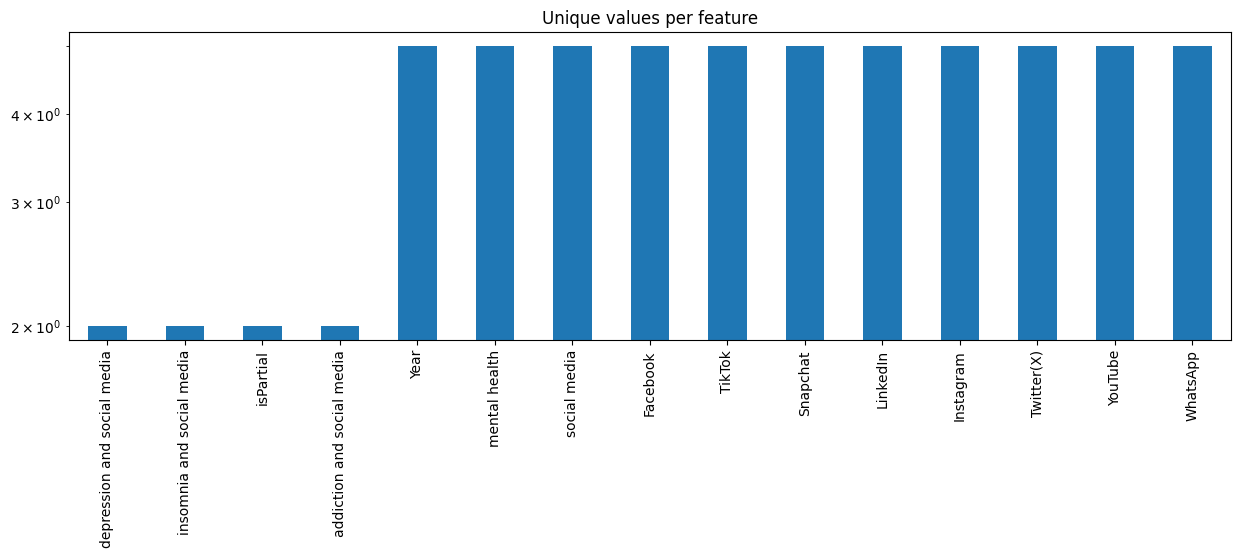

In [36]:
unique_values = API_data.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")

The following analysis explores the unique values in the dataset features and categorizes them accordingly.

**Number of Unique Values:**

The bar chart displays the number of unique values for each feature in the dataset. This helps us understand the diversity of the data and its distribution across various features.

**- Features with High Unique Values:**
Features such as year contain a very large number of unique values, indicating that they represent continuous temporal data, encompassing different years.

**- Features with Limited Unique Values:**
Features like addiction and social media, depression and social media, and insomnia and social media have a limited number of unique values; however, they are not binary data in the traditional sense. Instead, these features may represent metrics related to the impact of social media on feelings of addiction, depression, and insomnia, which are continuous metrics that can take on various values reflecting the intensity of these feelings.

**-Classification of Features Based on Unique Values:**
**Continuous Data:** All displayed features, including those related to addiction and depression, can be considered continuous data as they may reflect varying levels of impact or interaction with social media.
**Temporal Data:** Features such as year indicate temporal data, allowing for trend analysis over time.

## 1.3. Conclusion of Structure Investigation

This dataset consists of 5 samples and 16 features, where each sample represents an individual case with values across the features.

### Key Findings:

- **Data Types**:
  - There are **13 columns** of **float64** type (numerical values with decimals).
  - **2 columns** are of **int64** type (integer values).
  - **1 column** is of **object** type, representing categorical data for the country ("SA" for Saudi Arabia).

- **Numerical Features**:
  - Features like **year** have a high number of unique values, indicating they are continuous temporal data.
  - Features such as **addiction and social media**, **depression and social media**, and **insomnia and social media** have limited unique values. These metrics capture varying levels of impact from social media, rather than being binary.

### Classification:
- All features are classified as **continuous data**, reflecting varying levels of impact.
- **year** features are classified as **temporal data**, suitable for trend analysis over time.

This investigation provides insights into the data's diversity and distribution, serving as a foundation for further analysis.

# 2. Quality Investigation

Before analyzing the specific content of our Google Trends data, it’s important to assess the overall dataset quality. This includes checking for duplicates, missing values, and any unwanted entries or potential recording errors to ensure data integrity.

## 2.1. Duplicates

I do not need to study duplicates in Google Trends data because my research focuses on the frequency of searches related to specific topics. The primary objective is to assess public interest in these subjects over time. Since the data is collected based on specific temporal and geographical criteria, the presence of duplicates would not contribute meaningfully to understanding this interest. In fact, analyzing duplicates could obscure the insights derived from the frequency of searches. Therefore, I can rely on the search counts without the necessity of examining duplicates.

## 2.2. Missing Values

An important aspect of quality assessment is the examination of missing values within the dataset. While it is typical for datasets to have some incomplete entries, our objective is to pinpoint any considerable voids in the data.  Specifically, we aim to detect samples or features that exhibit a substantial number of missing values. This analysis is crucial in understanding the overall completeness of the data retrieved from Google Trends and ensuring the reliability of our findings regarding public interest in the examined topics.

### 2.2.1. Per sample

Text(0, 0.5, 'Sample Number')

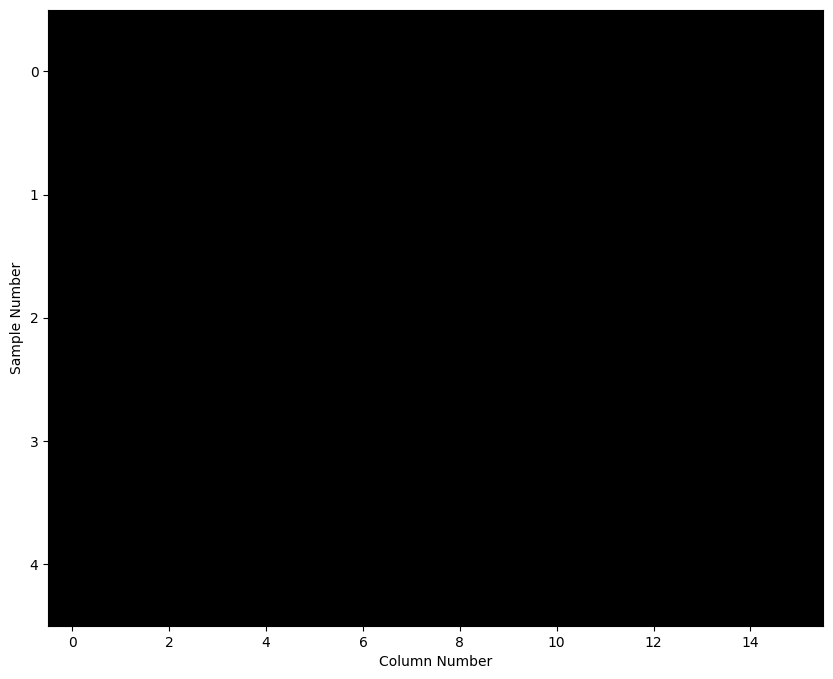

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(API_data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

The figure displays each sample (row) of the data against each column (feature) in the dataset. The black color indicates the absence of missing values, while the white color signifies their presence. Since there are no missing values in the data, the entire figure appears in black, indicating that all values are available and valid in the dataset. 

<Axes: >

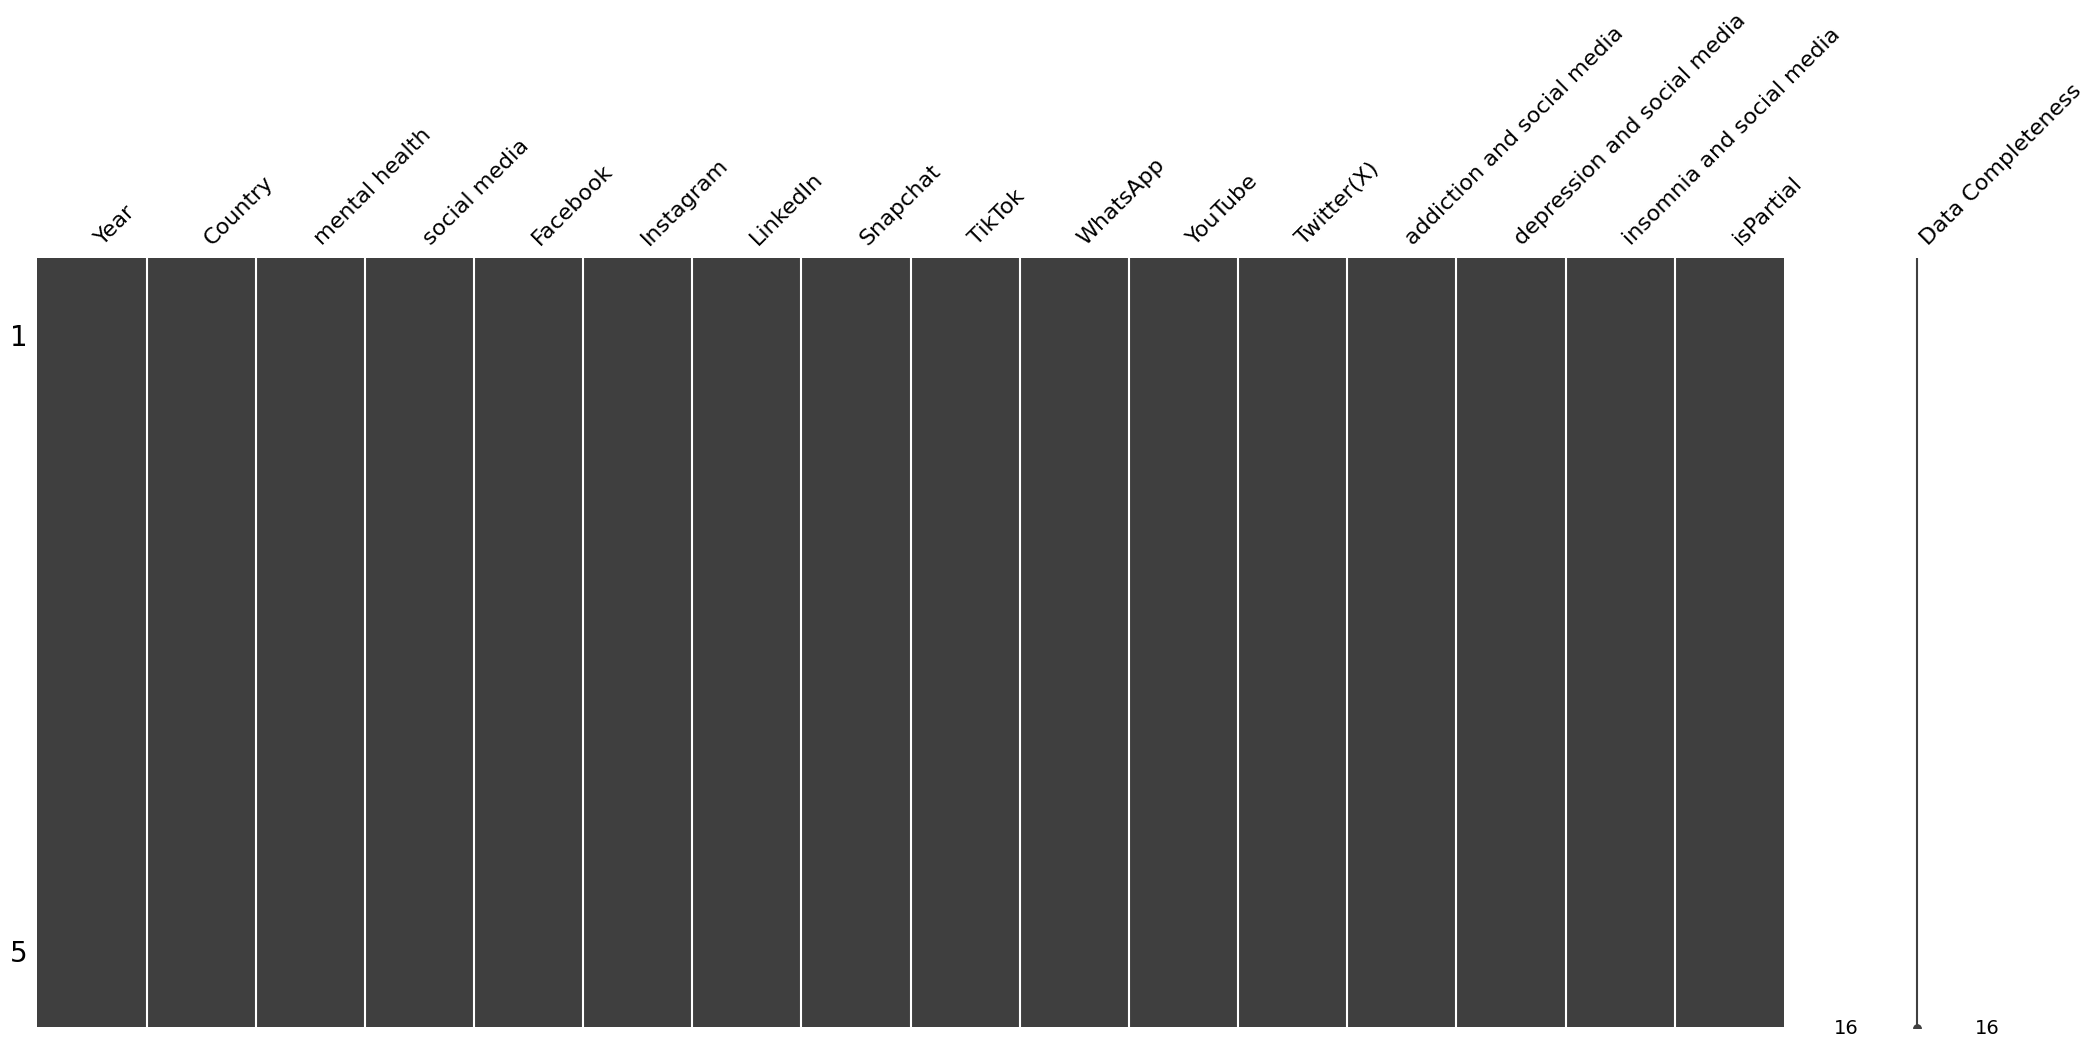

In [38]:
import missingno as msno

msno.matrix(API_data, labels=True, sort="descending")

The matrix from the missingno library clearly illustrates the completeness of the dataset. Given that every column is represented without any gaps, it can be concluded that the dataset is free from missing values.

### 2.3.1. Numerical Features
In this section, the numerical features in the dataset are analyzed to identify any unwanted entries or recording errors. The goal is to explore the overall distribution of the numerical data and detect any unusual or outlier values that might affect the final analysis. Box plots are used to understand the range of values, identify outliers, and ensure the quality of the numerical data being used.

Year                              Axes(0.125,0.712609;0.168478x0.167391)
mental health                  Axes(0.327174,0.712609;0.168478x0.167391)
social media                   Axes(0.529348,0.712609;0.168478x0.167391)
Facebook                       Axes(0.731522,0.712609;0.168478x0.167391)
Instagram                         Axes(0.125,0.511739;0.168478x0.167391)
LinkedIn                       Axes(0.327174,0.511739;0.168478x0.167391)
Snapchat                       Axes(0.529348,0.511739;0.168478x0.167391)
TikTok                         Axes(0.731522,0.511739;0.168478x0.167391)
WhatsApp                           Axes(0.125,0.31087;0.168478x0.167391)
YouTube                         Axes(0.327174,0.31087;0.168478x0.167391)
Twitter(X)                      Axes(0.529348,0.31087;0.168478x0.167391)
addiction and social media      Axes(0.731522,0.31087;0.168478x0.167391)
depression and social media           Axes(0.125,0.11;0.168478x0.167391)
insomnia and social media          Axes(0.327174,0.

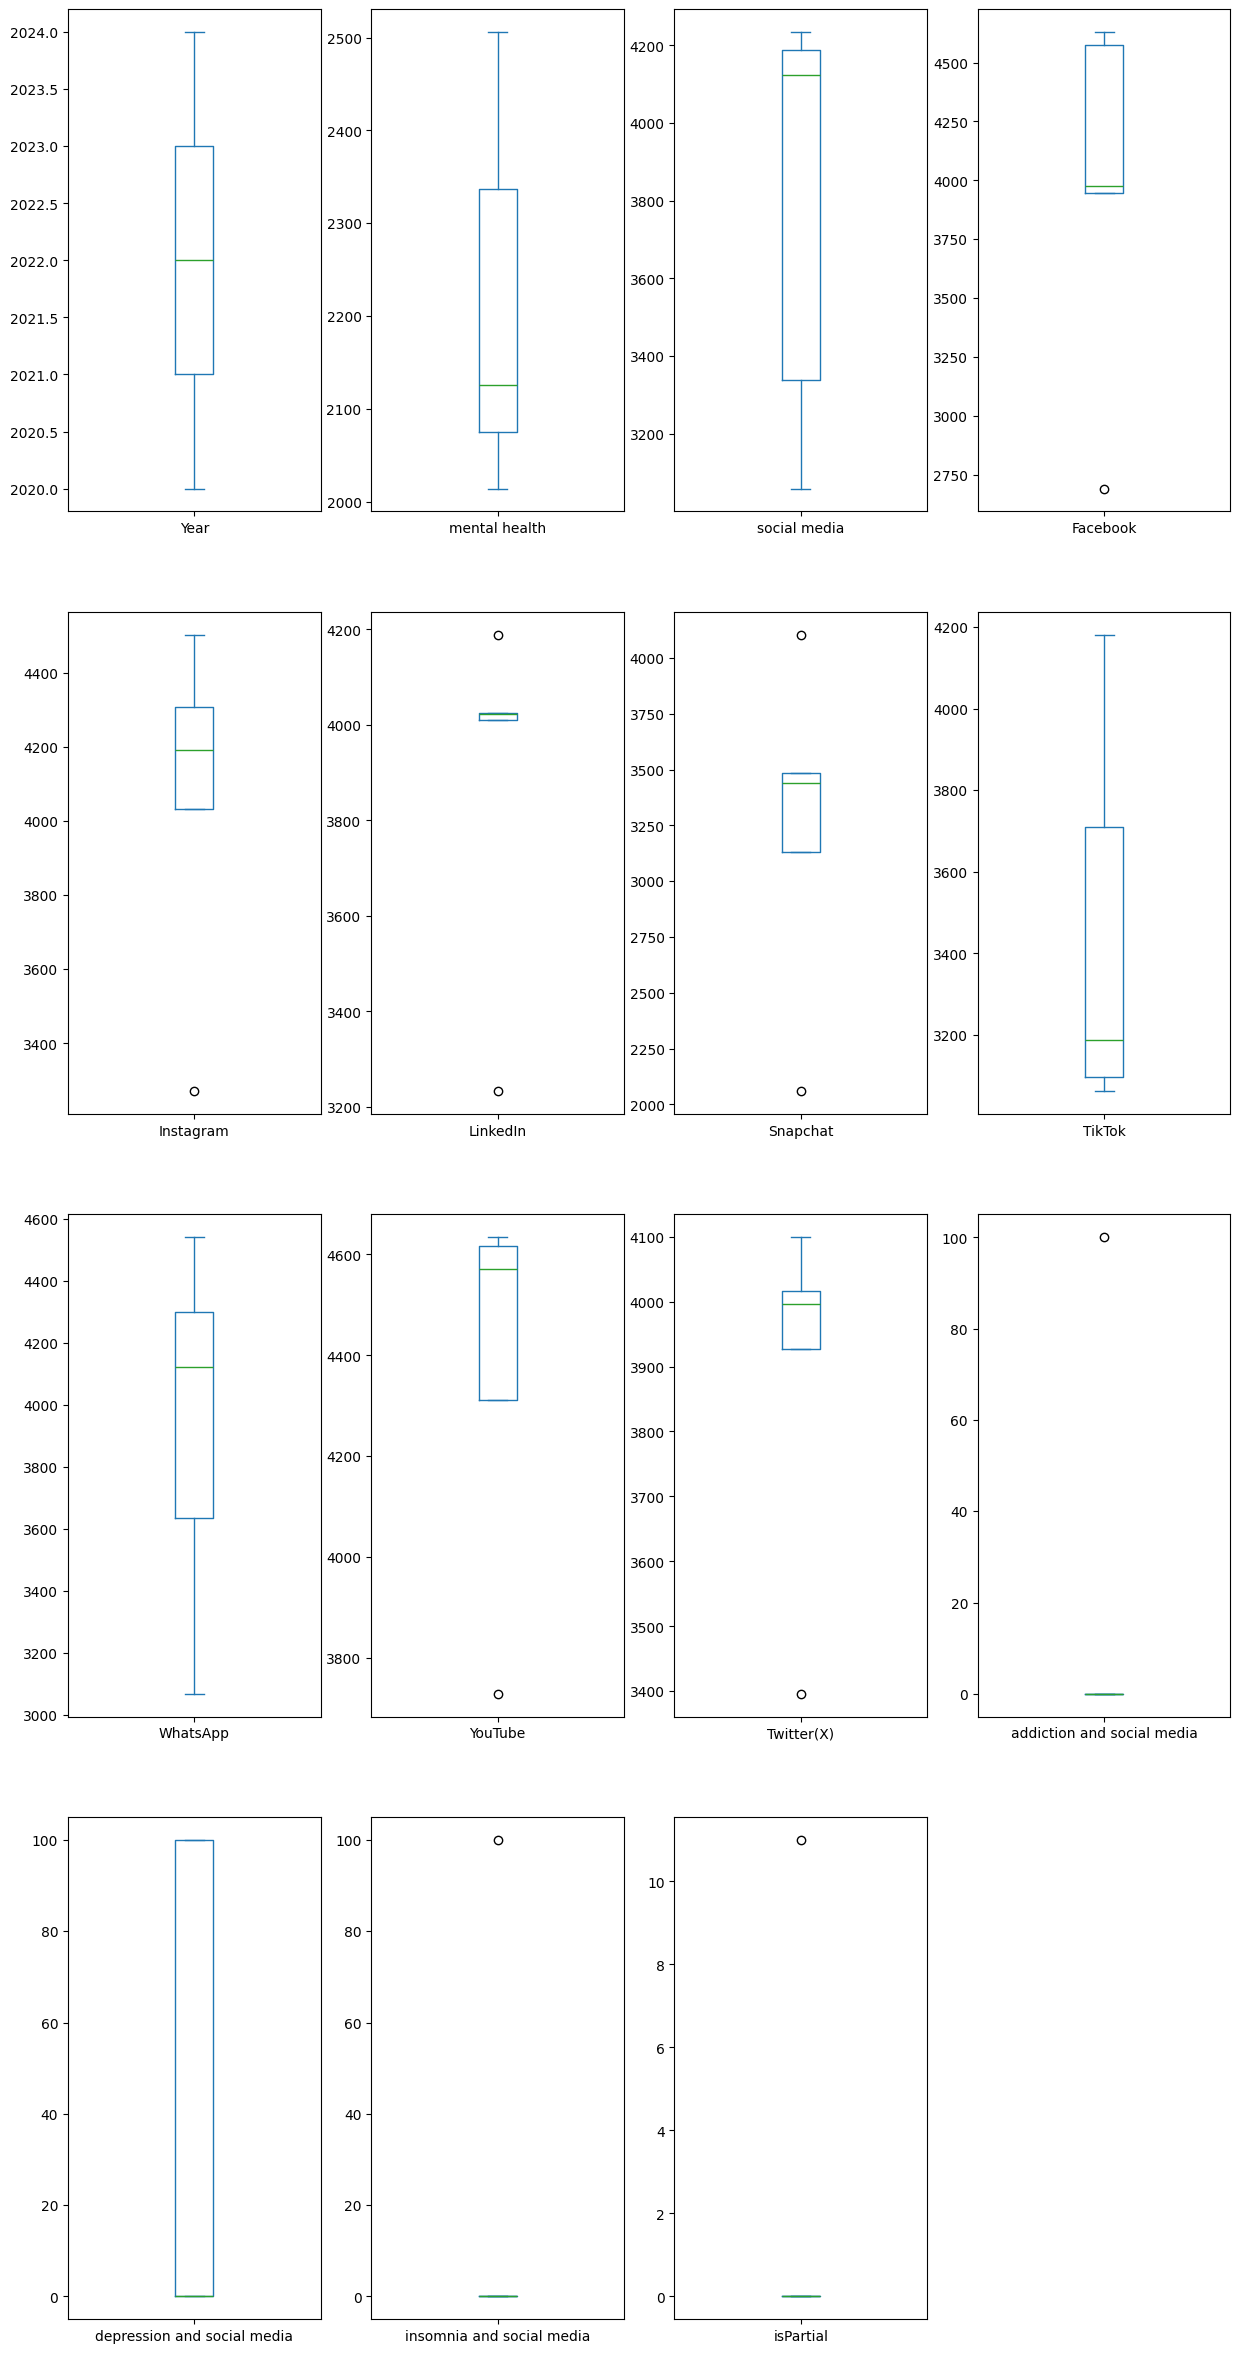

In [39]:
API_data.plot(kind='box', subplots=True, layout=(-1, 4), figsize=(15, 30))


The box plot visualizations represent the distribution of the numerical data in your Google Trends dataset across multiple features, with a specific focus on detecting outliers and understanding the spread of values.

1. **Year**: show a uniform spread from 2020 to 2024. There are no visible outliers, indicating that the data spans across these years without anomalies.

2. **Mental Health & Social Media**: The box plot for social media shows a wider range of values compared to mental health, indicating more variability in searches related to social media. Both have no extreme outliers.

3. **Social Media Platforms (Facebook, Instagram, etc.)**:
   - **Facebook** and **YouTube**: Both have outliers, indicating certain periods where search interest was significantly higher or lower than the usual distribution.
   - **Instagram**, **LinkedIn**, **Snapchat**: All display outliers, meaning that there were some unusually low search results compared to the overall dataset.
   - **TikTok** and **WhatsApp**: These two platforms have a broad distribution but no significant outliers.

4. **Twitter(X)**: Shows a smaller range of variability with an outlier, suggesting one or two data points significantly deviated from the norm.

5. **Mental Health & Social Media Topics**:
   - **Addiction, Depression, and Insomnia related to Social Media**: All three of these show extremely low values, with a few scattered outliers, which might represent specific peaks in search interest.
   - The range is compressed toward the bottom, indicating that these topics generally did not generate much search interest, but with occasional spikes that stand out as outliers.

6. **IsPartial**: Also shows an outlier. This feature might be related to incomplete data retrievals from the Google Trends API, hence the outlier.

### Key Takeaways:
- **Outliers**: Many of the social media platforms (e.g., Instagram, LinkedIn, YouTube) show outliers, which could correspond to events that caused spikes or drops in search interest for these platforms.
- **Range**: Features like "social media" and "TikTok" show a wide range of values, meaning searches related to them were more variable compared to more focused terms like "mental health" or the specific conditions (addiction, depression).
- **Unusual Patterns**: For addiction, depression, and insomnia, search interest was mostly low with a few spikes. These may need closer investigation to understand the cause of the outliers.


### 2.3.2 Show that five-number summary

In [38]:
summary_stats=API_data.describe()
print(summary_stats)

              Year  mental health  social media    Facebook    Instagram  \
count     5.000000       5.000000      5.000000     5.00000     5.000000   
mean   2022.000000    2211.600000   3788.200000  3963.60000  4060.600000   
std       1.581139     204.590567    548.699098   779.86236   473.591913   
min    2020.000000    2014.000000   3059.000000  2692.00000  3271.000000   
25%    2021.000000    2075.000000   3338.000000  3947.00000  4031.000000   
50%    2022.000000    2126.000000   4123.000000  3976.00000  4192.000000   
75%    2023.000000    2337.000000   4187.000000  4574.00000  4307.000000   
max    2024.000000    2506.000000   4234.000000  4629.00000  4502.000000   

          LinkedIn     Snapchat       TikTok     WhatsApp      YouTube  \
count     5.000000     5.000000     5.000000     5.000000     5.000000   
mean   3896.000000  3243.200000  3447.000000  3933.600000  4372.400000   
std     377.885565   750.495969   486.422142   585.793308   382.370632   
min    3233.000000 


**Summary of the numeric columns**

1. **Year**
- **Range**: 2020 to 2024.
- **Mean**: 2022, indicating that the data is centered around recent years.
- The standard deviation is low (1.58), indicating that the years are close to the mean.

2. **Mental Health**
- **Range**: 2014 to 2506, indicating a wide range of mental health measures.
- **Mean**: 2211.6, indicating a general upward trend over the years.
- **Standard Deviation**: 204.59, showing moderate variation.

3. **Social Media**
- **Range**: 3059 to 4234.
- **Mean**: 3788.2, indicating that social media interest has also been increasing over the years.
- **Standard Deviation**: 548.70 indicates high variability, reflecting fluctuating interest.

4. **Platform Specific Data (Facebook, Instagram, LinkedIn, etc.)**
- Each platform shows an increasing trend in engagement, with averages being higher than their respective lows.
- **For Facebook**: Values ​​range from 2692 to 4629, with a mean of 3963.6.
- **For Instagram**: Range from 3271 to 4502, with a mean of 4060.6.
- **LinkedIn** shows a lower range but is still increasing over the years.

5. **Depression, Insomnia, Addiction, and Social Media**
- **Range**: 0 to 100 with a median of 40 and 20.
- The majority of mental health outcomes (depression, insomnia, anxiety) show zero values, with one or two values ​​being 100, indicating data outages. This suggests that a significant number of respondents did not report issues related to depression related to social media.

7. **IsPartial**
- **Range**: 0 to 11, with a median of 2.2.
- This indicates that the dataset contains incomplete data, and is for the year 2024.

### Key Insights and Relationships

- **General Trends**: There has been a general increase in mental health metrics and social media use over the years, suggesting a relationship between increased social media use and mental health metrics.

**Addiction and Depression for Insomnia and Social Media**: Low medians (20 for addiction and 40 for depression) combined with high extremes (100) indicate a wide range of significant differences. All but one year were zero, indicating a problem in identifying these sentences.

### 2.3.3 Handling outliers

Based on the previous results, it is clear to us that there are extreme values ​​that need to be taken action towards them, so we will now identify them more precisely and review them to take appropriate action.

In [3]:
outliers = {}

for column in API_data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = API_data[column].quantile(0.25)
    Q3 = API_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    outlier_values = API_data[(API_data[column] < lower_bound) | (API_data[column] > upper_bound)][column]
    outliers[column] = outlier_values

# Print the results
print("\nOutliers in each column:")
for column, outlier_values in outliers.items():
    outlier_count = outlier_values.shape[0]
    print(f"Column '{column}' has {outlier_count} outlier(s).")
    
    if outlier_count > 0:
        print(f"Outlier values in column '{column}': {outlier_values.values}")



Outliers in each column:
Column 'Year' has 0 outlier(s).
Column 'mental health' has 0 outlier(s).
Column 'social media' has 0 outlier(s).
Column 'Facebook' has 1 outlier(s).
Outlier values in column 'Facebook': [2692.]
Column 'Instagram' has 1 outlier(s).
Outlier values in column 'Instagram': [3271.]
Column 'LinkedIn' has 2 outlier(s).
Outlier values in column 'LinkedIn': [4189. 3233.]
Column 'Snapchat' has 2 outlier(s).
Outlier values in column 'Snapchat': [4104. 2059.]
Column 'TikTok' has 0 outlier(s).
Column 'WhatsApp' has 0 outlier(s).
Column 'YouTube' has 1 outlier(s).
Outlier values in column 'YouTube': [3729.]
Column 'Twitter(X)' has 1 outlier(s).
Outlier values in column 'Twitter(X)': [3396.]
Column 'addiction and social media' has 1 outlier(s).
Outlier values in column 'addiction and social media': [100.]
Column 'depression and social media' has 0 outlier(s).
Column 'insomnia and social media' has 1 outlier(s).
Outlier values in column 'insomnia and social media': [100.]
Colu

Based on the results, we can conclude the following:

1. **Columns with long phrases** like `'addiction and social media'`, `'insomnia and social media'`, and `'depression and social media'` behave differently compared to other columns. Most of them have few or no outliers at all, suggesting that the API may not handle long phrases well or process them accurately. 
2. **Words with outliers**, such as the columns related to `'Facebook'`, `'Instagram'`, `'YouTube'`, and other platforms, show significant variations in interest over time. These variations are useful because they indicate shifts in user behavior and the impact of major events or platform updates. 

3. **isPartial**: The outlier in this column relates to the last year (2024), indicating that the data is incomplete for this period.

**Based on these results we will do the following:**
- **Remove the columns** with long phrases like `'addiction and social media'` and `'insomnia and social media'`, as they don't add clear value to the analysis due to the API's inability to process them effectively.
- **Keep the columns** with useful outlier values, such as the social media platforms (Facebook, Instagram, etc.), as they can provide valuable insights into user behavior.
- **Handle isPartial** as a special case, recognizing that the outlier in 2024 is due to incomplete data, which should be considered when conducting the final analysis.

In [3]:
columns_to_drop = ['addiction and social media', 'insomnia and social media', 'depression and social media']

API_data_cleaned = API_data.drop(columns=columns_to_drop)

print("Data after removing long phrase columns:")
print(API_data_cleaned.head())
API_data_cleaned.to_csv('APIGoogleTrends_dataSA_afterCleaning.csv', index=False)

Data after removing long phrase columns:
   Year Country  mental health  social media  Facebook  Instagram  LinkedIn  \
0  2020      SA         2014.0        4123.0    3947.0     4307.0    4010.0   
1  2021      SA         2337.0        3059.0    3976.0     4502.0    4026.0   
2  2022      SA         2075.0        4187.0    4629.0     4031.0    4022.0   
3  2023      SA         2126.0        4234.0    4574.0     4192.0    4189.0   
4  2024      SA         2506.0        3338.0    2692.0     3271.0    3233.0   

   Snapchat  TikTok  WhatsApp  YouTube  Twitter(X)  isPartial  
0    4104.0  3096.0    4299.0   4312.0      3927.0          0  
1    2059.0  3187.0    3637.0   4616.0      4016.0          0  
2    3129.0  3709.0    4123.0   4571.0      3996.0          0  
3    3441.0  4181.0    4540.0   4634.0      4099.0          0  
4    3483.0  3062.0    3069.0   3729.0      3396.0         11  


### 2.3.2. Non-numerical features

for this analysis, I find it unnecessary to examine this aspect closely, as my focus is on the most searched topics specifically in Saudi Arabia. Furthermore, the only non-numerical feature in my dataset is the Saudi city, and all values are derived from searches conducted within Saudi Arabia. Therefore, a detailed investigation of non-numerical features is not required for my data.

# 3. Content Investigation

Up until now we only looked at the general structure and quality of the dataset. Let's now go a step further and take a look at the actual content. an investigation would be done feature by feature.

we will explore three different approaches that can give us a very quick overview of the content stored in each feature and how they relate.

### 3.1. Feature distribution

To gain a better understanding of the content of our data and providing an useful information with regards to data cleaning and feature transformation,we are going to Looking at the value distribution of each feature by histogram function that allows the plotting of multiple features at once 

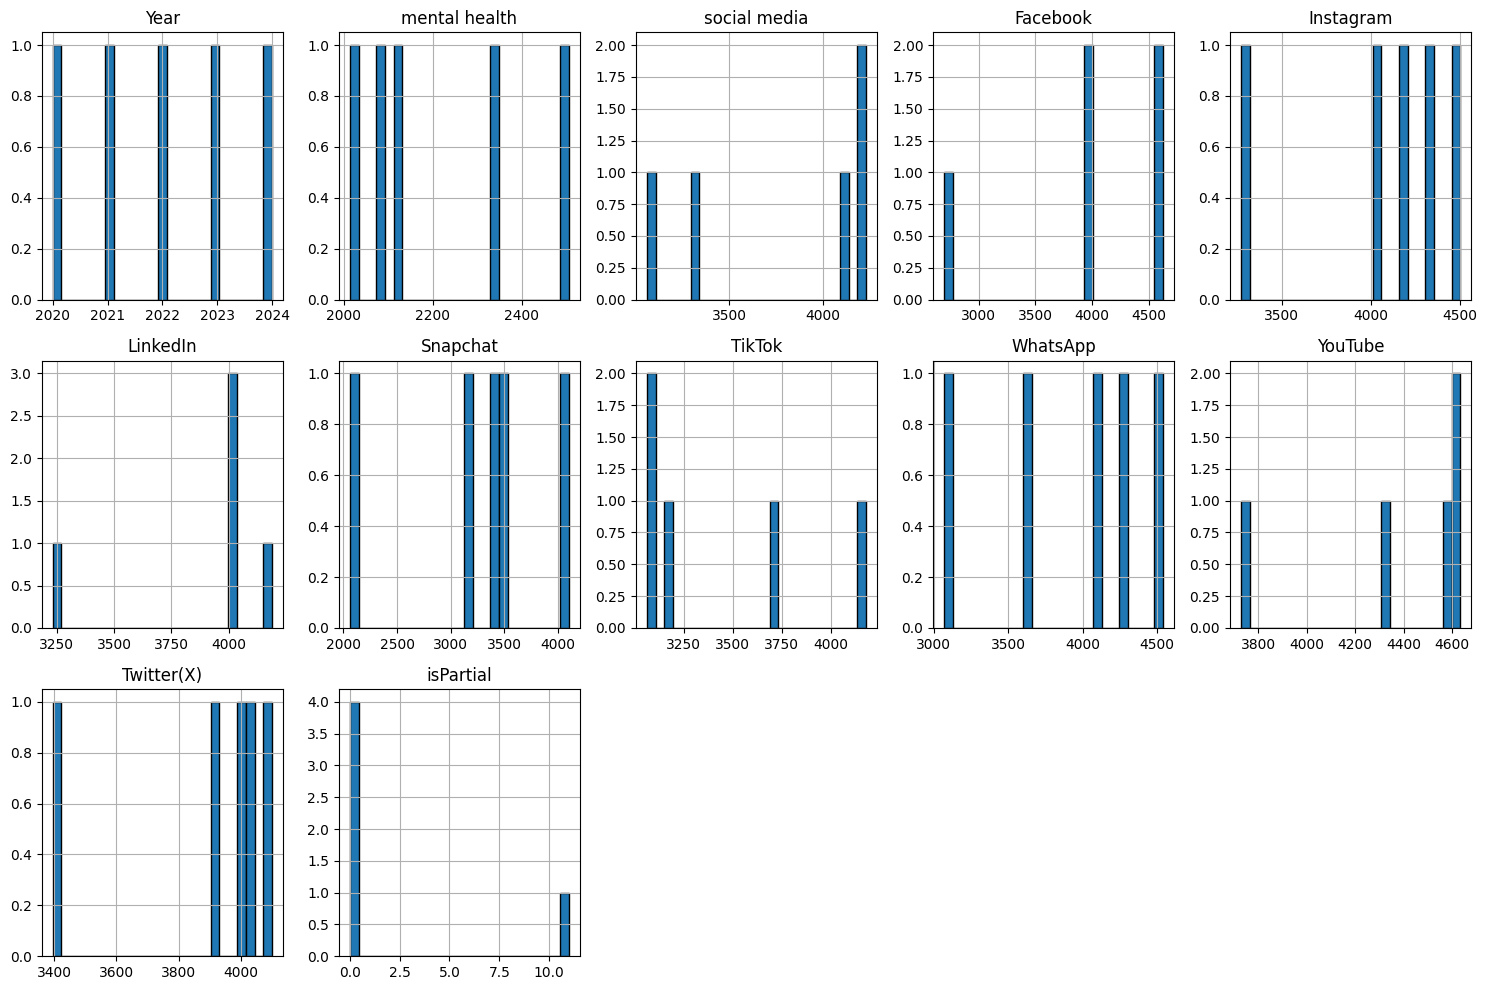

In [5]:
import matplotlib.pyplot as plt

API_data_cleaned.hist(bins=25, figsize=(15, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

Looking at the charts presented, the results can be analyzed as follows:

1. **Year**:
- The data appears to be evenly distributed across the five years (2020 to 2024). Each year is represented roughly evenly, indicating that there is no significant variation between years. This means that the data has been collected consistently over this time period.

2. **mental health**:
- It shows a consistent distribution, with values ​​distributed in narrow ranges. This may indicate that interest or research into mental health has been consistent over the years without significant changes in the distribution.

3. **social media**:
- This column shows variation in the distribution of the data, with specific datasets appearing at specific values. This may indicate that interest in social media has experienced periods of ups and downs over the years, perhaps linked to specific events or shifts in online social behavior.

4. **Facebook**:
- The distribution of the data shows that there is a large concentration around a particular value with a cluster of data appearing at the edges of the graphs. Interest or usage of Facebook appears to have been relatively stable, but with some periods that may indicate changes in behavior or significant events that affected the distribution.

5. **Instagram**:
- The distribution of Instagram shows that the data is mainly concentrated around a particular cluster of values, with some minor deviations. This may indicate that Instagram has maintained a steady level of interest, but there may have been some periods of minor changes in usage.

6. **LinkedIn**:
- The data shows greater variability in LinkedIn than in some of the other columns, as we see the data spread out across a wide range, which may indicate fluctuations in interest in LinkedIn over time. This may be related to changes in the economy, the job market, or changes to the platform itself.

7. **Snapchat**:
- The distribution shows a relatively wide spread, with some particularly high values, which may indicate fluctuations in interest levels for Snapchat. This may indicate changes in usage of the platform over time.

8. **TikTok**:
- The data is relatively narrowly distributed, meaning that interest in TikTok has been relatively stable over the time period represented. There appear to be even clusters of values, indicating steady growth or only slight fluctuations.

9. **WhatsApp**:
- The distribution of the data shows clear stability with some narrow clusters of values. This suggests that WhatsApp usage or interest has been generally stable, with some periods where there may have been slight changes.

10. **YouTube**:
- YouTube shows greater variation in the distribution with some values ​​being more widely distributed. This indicates that interest in the platform has seen varying periods of ups and downs over time, possibly related to specific events or trends in videos or users.

11. **Twitter(X)**:
- The data for Twitter(X) appears more evenly distributed than some of the other columns, indicating a significant variability in interest over time. This could be the result of major political or social events that have significantly impacted Twitter usage.

12. **isPartial**:
- This column shows that the data is incomplete or partial in some cases, showing a jump in value in the most recent year (2024). This indicates that the data has not yet been fully collected for this year.

### Conclusion:
Overall, the graphs suggest that some platforms such as **Instagram**, **WhatsApp**, and **TikTok** have seen relative stability in interest or usage over time, while others such as **LinkedIn**, **Twitter(X)**, and **Snapchat** have shown greater fluctuations in distribution. These fluctuations may be related to changes in public events, platform updates, or even user behavioral trends.

Year             1.0
mental health    0.4
WhatsApp         0.4
Facebook         0.2
isPartial        0.2
dtype: float64

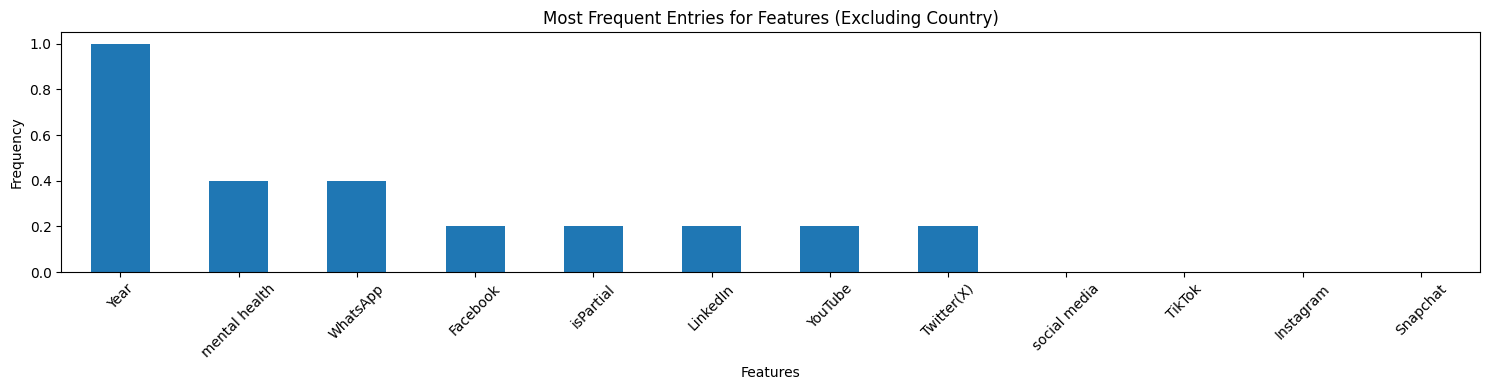

In [6]:

most_frequent_entry = API_data_cleaned.drop(columns=['Country']).mode()

df_freq = API_data_cleaned.drop(columns=['Country']).eq(most_frequent_entry.values, axis=1)

df_freq = df_freq.mean().sort_values(ascending=False)

display(df_freq.head())

df_freq.plot.bar(figsize=(15, 4))
plt.title('Most Frequent Entries for Features (Excluding Country)')
plt.ylabel('Frequency')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph shows a bar plot representing the top 5 features with the highest ratio of singular value content. Here's how to interpret it:

* X-Axis: The feature names.
* Y-Axis: The ratio of occurrences of the most frequent value for each feature.
* Bar Heights: The height of each bar indicates how frequently the most common value appears in that feature.

Key Insights:
If a bar reaches close to 1 (or 100%), it means that nearly all entries in that feature have the same value, suggesting it has very little variability as "Year" feature.

**Analysis of Results:**

1. **Year**: The value **1.0** indicates that every row (100%) contains the same value for the **Year** feature, which is expected since the dataset only includes the years from **2020 to 2024**.

2. **Mental Health**: The frequency of **0.4** indicates that **40%** of the entries for this feature share the same most common value. This suggests a variability in the data regarding searches related to mental health.

3. **WhatsApp**: Similar to mental health, a frequency of **0.4** indicates a notable presence of a specific value, reflecting a consistent interest in WhatsApp over the years.

4. **Facebook, LinkedIn, YouTube, and Twitter (X)**: Each shows a frequency of **0.2**, meaning that **20%** of their entries share the same value. This indicates that while there are some commonalities, there are also significant fluctuations in interest over the years.

5. **Social Media, Instagram, Snapchat, TikTok**: All have a frequency of **0.0**, indicating that the values for these features did not match the most common value. This suggests that the values in these features are more diverse, reflecting fluctuating interest.


The analyses indicate variability in the data for most features, particularly regarding mental health and WhatsApp, while other social media platforms exhibit diverse levels of interest over the years. The stability of the Year feature confirms that the dataset covers a specific timeframe, allowing for accurate analysis of trends in future evaluations.

* Clarification

The Country column was excluded from the analysis in the code because it contains the same value in all rows (Saudi Arabia). This uniformity in the data means there was no variability or additional information that could be extracted from this column.


### 3.2. Feature patterns

now we are going to investigate of feature specific patterns to  identify particular relationships between features that will help us to better understand our dataset

Initially, we created heatmaps to visualize the relationship between each feature and the year, allowing us to identify trends, explore the strength and nature of these relationships, and facilitate comparative analysis.

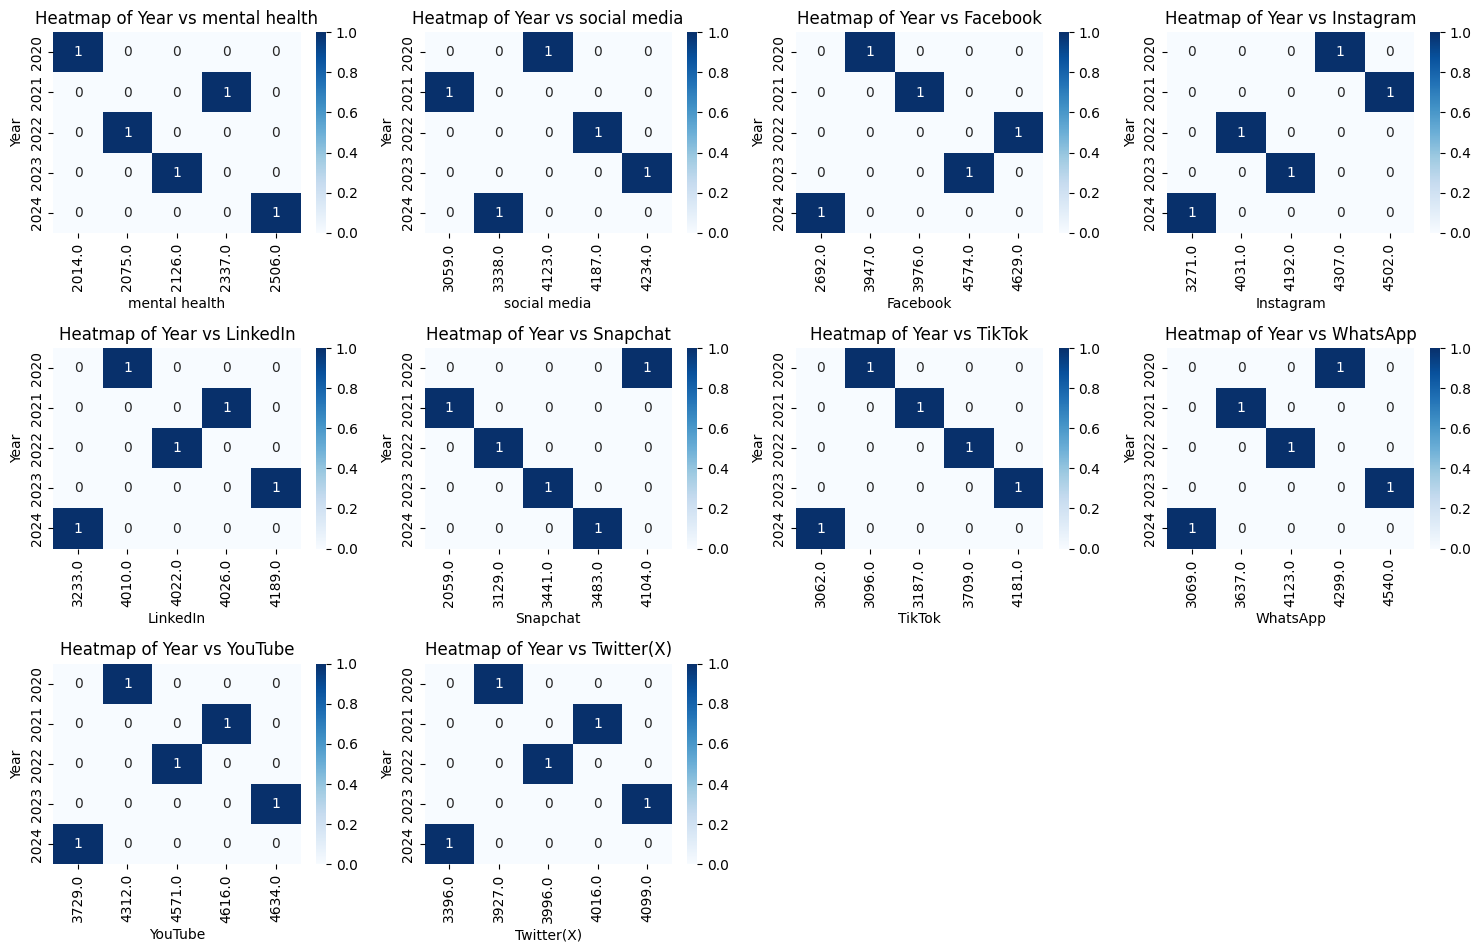

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(15, 12))

columns_to_analyze = [
    'mental health', 'social media', 'Facebook', 'Instagram', 'LinkedIn',
    'Snapchat', 'TikTok', 'WhatsApp', 'YouTube', 'Twitter(X)',
]

for i, column in enumerate(columns_to_analyze):
    plt.subplot(4, 4, i + 1) 
    cross_tab = pd.crosstab(API_data_cleaned['Year'], API_data_cleaned[column])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Heatmap of Year vs {column}')
    plt.xlabel(column)
    plt.ylabel('Year')

plt.tight_layout()
plt.show()


Heatmaps that incorporate years make it easier to visualize trends over time, offering insights into patterns between variables and highlighting the strength of their relationships.

Our observations include the following:
1. **Temporal Distribution**:
- There is an almost positive association between the year and mental health, with searches related to mental health increasing over time.
- Searches for Facebook rose in earlier years but declined in more recent years.
- Searches for Instagram showed a downward trend as the years progressed.
- Snapchat searches dropped in 2021 but have surged significantly in recent years.
- TikTok searches increased from 2020 to 2023, followed by a decline in the last year.

However, we found no consistent relationship between the frequency of searches for "social media," "LinkedIn," "WhatsApp," "YouTube," and "Twitter" over the years.

2. **Relationship between Years and Topics**:
- **Mental Health**: The heatmap shows that the years represent a continuous development in research and discussion around the topic of mental health. This indicates a growing awareness of mental issues in recent years.

### Conclusion
The heatmaps show the interactive patterns between year, mental health, and social media.

#### 3.2.1. Continuous features

We do not have any continuity data, so we have not taken any actions related to continuity data.

In [4]:

cols_continuous = API_data_cleaned.select_dtypes(include="number").nunique() >= 25

In [5]:

df_continuous =API_data_cleaned[cols_continuous[cols_continuous].index]
df_continuous.shape

(5, 0)

#### 3.2.2. Discrete and ordinal features

To gain deeper insights into the relationships between different features relate to each other , we will first identify and select the relevant columns for our investigation

In [6]:

cols_continuous = API_data_cleaned.select_dtypes(include="number").nunique() >= 25

In [7]:

df_discrete =API_data_cleaned[cols_continuous[~cols_continuous].index]
df_discrete.shape

(5, 12)

we will investigate all of these features using heatmap visualization as a suitable option for discrete type data

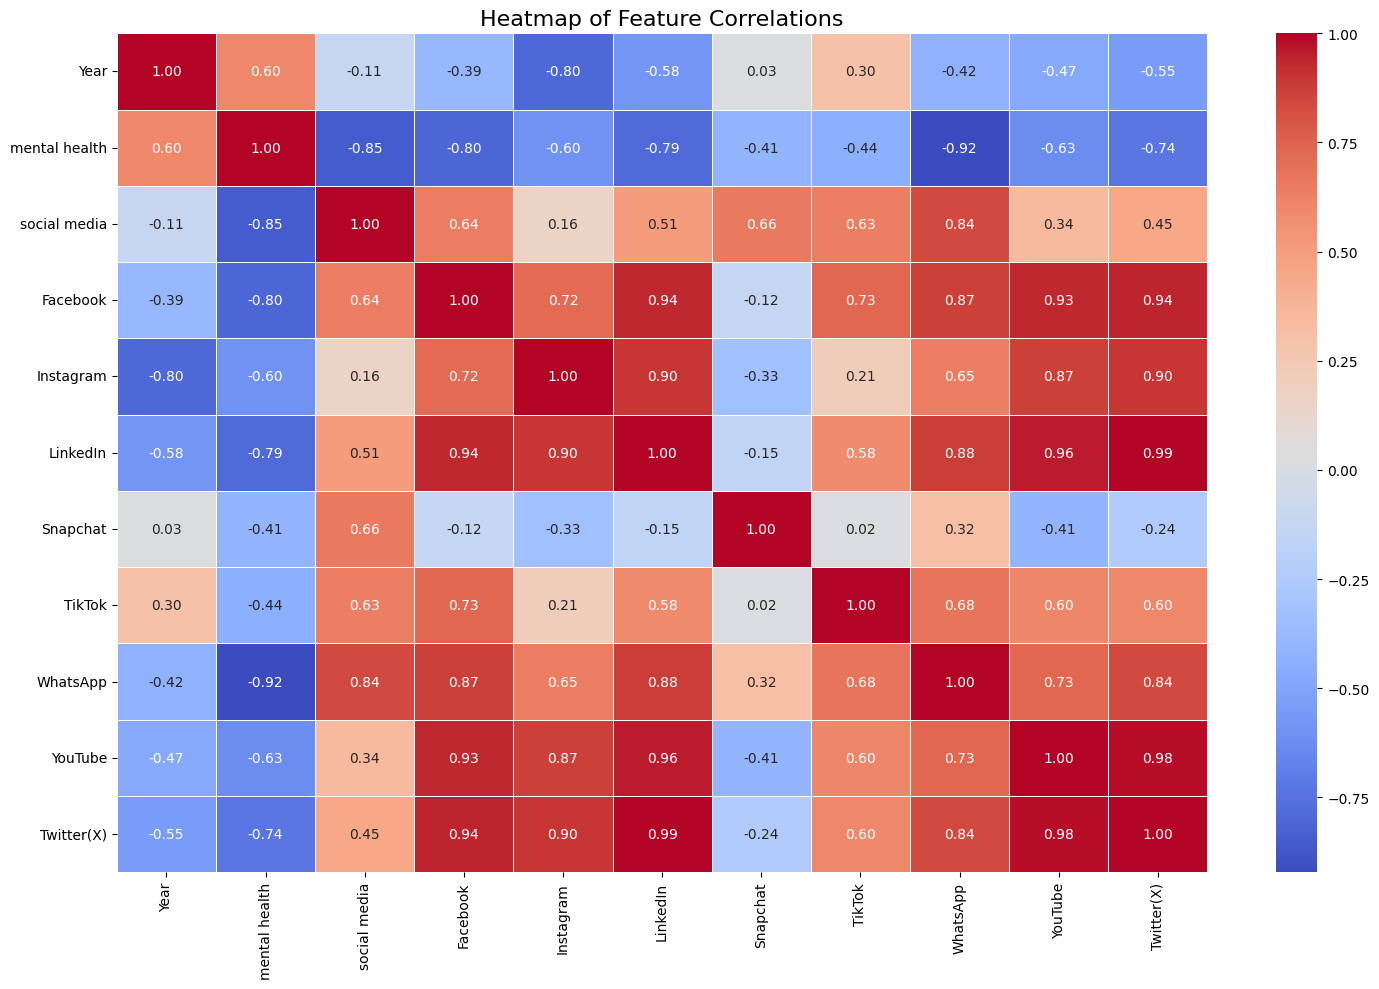

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df_discrete_filtered = df_discrete.drop(columns=['isPartial'])

correlation_matrix = df_discrete_filtered.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.tight_layout()
plt.show()


##### a general interpretation of The heatmap above that shows the correlation matrix:

* Strong Correlations (close to 1 or -1): Some social media platforms, like Facebook, Instagram, YouTube, and WhatsApp, may show high correlations, suggesting that usage trends across these platforms are similar.
* Weak or No Correlation (close to 0): Some features, may not correlate strongly with others.
* Negative Correlations: If any negative correlations are present, they suggest an inverse relationship, where an increase in one feature is associated with a decrease in another.

as an example : 

Twitter(X): 
*  strong Correlation between Twitter(X) feature and Facebook, Instgram,LinkedIn,Whatspp and Youtube features ,that means The more searches for Twitter increase, the searches for LinkedIn and Facebook... increase and vice versa.
*  weak Correlation between Twitter(X) and tiktok,social media features, that means The more searches for Twitter increase, the searches for  tiktok,social media increase somewhat and vice versa.
*  Negative Correlation between Twitter(X) feature and mental health feature , that means  The more searches for Twitter increase, the searches for mental health... decrease and vice versa.
*  weak Negative Correlation between Twitter(X) feature and snapchat Snapchat feature that means The more searches for Twitter increase, the searches for Snapchat decrease somewhat, and vice versa.

##### Insights:
* There is a strong correlation between Twitter, LinkedIn, Facebook, Instagram, YouTube and WhatsApp ,This could indicate that users tend to engage with multiple platforms simultaneously
* There is a negative correlation between mental health and social media and all its platforms.
* There is a weak correlation between social media and all platforms except WhatsApp, which is considered a strong correlation


### 3.3 Feature relationships

Last, but not least, let's take a look at relationships between features. More precisely how they correlate. The quickest way to do so is via pandas' .corr() function. So let's go ahead and compute the feature to feature correlation matrix for all numerical features.

In [9]:

df_corr = df_discrete.corr(method="pearson")

based on our dataset and the kind of features that amost of it are discrete, we will use pearson method to compute the correlation. And to help with the interpretation of this correlation we are going to use seaborn's .heatmap() to visualize the  correlation matricx .

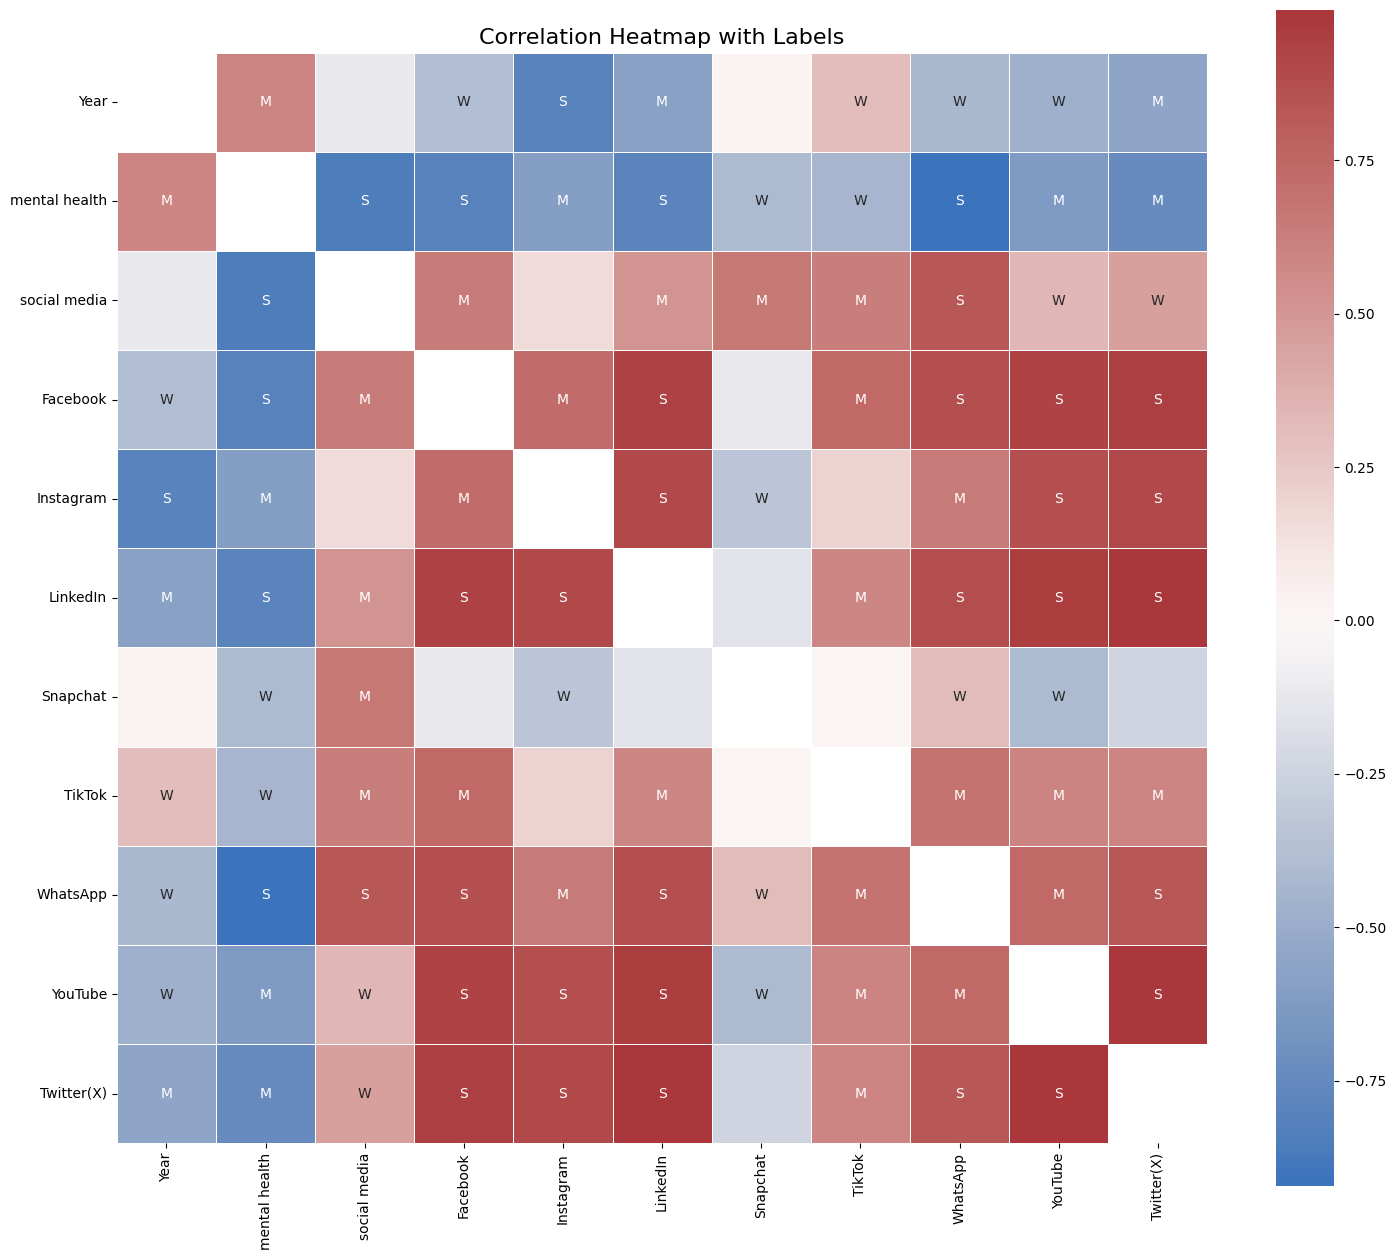

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_corr_filtered = df_corr.drop(columns=['isPartial'], index=['isPartial'])

labels = np.where(np.abs(df_corr_filtered) > 0.75, "S",
                  np.where(np.abs(df_corr_filtered) > 0.5, "M",
                           np.where(np.abs(df_corr_filtered) > 0.25, "W", "")))

plt.figure(figsize=(15, 15))
sns.heatmap(df_corr_filtered, mask=np.eye(len(df_corr_filtered)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap with Labels', fontsize=16)
plt.tight_layout()
plt.show()


This heatmap is similar to the heatmap mentioned in section 3.2.2 and the results are the same, but the difference here is that this heatmap is coded with letters that indicate the correlation between the features to facilitate understanding and see the relationships more clearly, where:
* S means strong correlation (absolute value greater than 0.75)
* M means medium correlation(absolute value between 0.5 and 0.75)
* W means weak correlation(absolute value between 0.25 and 0.5)
* An empty string for correlations below 0.25, which are not labeled.

We will also order the correlations between different features to make it easier to identify important relationships. By displaying the correlations from most negative to most positive, we will highlight the feature pairs that have the strongest interactions, both inverse and direct, to prioritize analysis, and discover patterns.

To order all of these different correlations, we will do this:

In [11]:
import numpy as np
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

display(df_corr_stacked)


isPartial   LinkedIn        -0.980795
            Twitter(X)      -0.975922
            YouTube         -0.940636
            Instagram       -0.932026
WhatsApp    mental health   -0.921408
                               ...   
LinkedIn    Facebook         0.937804
Twitter(X)  Facebook         0.943259
YouTube     LinkedIn         0.956848
Twitter(X)  YouTube          0.981474
            LinkedIn         0.994743
Length: 66, dtype: float64

The output is indeed ordered, showing correlations from the most negative to the most positive. Here’s an explanation considering the order:

- **Strong Negative Correlations (at the top)**: These indicate that as one feature increases, the other tends to decrease. For instance:
  - **WhatsApp vs. Mental Health (-0.921408)** shows a significant inverse relationship, suggesting that increased searches for WhatsApp are associated with a decrease in mental health-related searches.

- **Strong Positive Correlations (at the bottom)**: These indicate that both features tend to increase or decrease together. For example:
  - **Twitter(X) vs. LinkedIn (0.994743)** and **Twitter(X) vs. YouTube (0.981474)** show exceptionally strong positive correlations, implying that searches for these platforms move almost in unison.
  - **LinkedIn vs. Facebook (0.937804)** also exhibits a high positive correlation, suggesting a strong interrelated search trend between these platforms.

The ordered output highlights that the strongest negative relationships appear first, followed by increasingly positive correlations, illustrating a gradient from inverse to direct associations.

### 3.4  Conclusion of content investigation

The content investigation has provided valuable insights into the dataset, revealing significant trends and relationships among various features. Here are the key takeaways:

1. **Feature Distribution**:
   - The feature distributions highlight distinct patterns in search trends over the years. For instance, while mental health searches show a consistent upward trend, platforms like Facebook and Instagram exhibit declining interest. In contrast, TikTok displays significant volatility, reflecting its rising popularity.
   - The **Year** feature demonstrates uniformity, confirming that the dataset encompasses a specific timeframe (2020-2024).
   

2. **Feature Patterns**:
   The heatmap analysis uncovers strong correlations among various social media platforms, indicating that search trends for these platforms are often interconnected. For instance, increases in Twitter searches closely align with those of LinkedIn, Facebook, Instagram, and YouTube, suggesting a shared audience or simultaneous interest.
   
   Conversely, a negative correlation exists between Twitter searches and mental health . This suggests that as interest in Twitter rises, searches related to mental health may decline. When people focus more on mental health topics, searches for social media platforms tend to decrease, indicating that heightened concern for mental well-being can divert attention away from social media discussions. This highlights the  relationship between social media usage and mental health issues.



3. **Feature Relationships**:
   - there is a significant inverse relationship between WhatsApp and mental health, indicating that increased searches for WhatsApp are associated with a decline in mental health-related searches.

   - Twitter(X) and LinkedIn, as well as Twitter(X) and YouTube, exhibit very strong positive correlations, meaning that searches for these platforms often increase or decrease together. Additionally, LinkedIn and Facebook also show a high positive correlation, suggesting that their search trends are closely linked.
   


### 3.5 Data Biases

1. **Selection Bias**:  
   The data collected from **Google Trends** reflects only the search behavior of users who use Google. This introduces a bias, as it does not represent the entire population or those who use other search engines or platforms. The trends may not accurately reflect the behavior of individuals who directly engage with social media without searching for related topics.

2. **API Limitations on Phrase Length**:  
   Long phrases like "addiction and social media" or "insomnia and social media" may not be processed accurately by the Google Trends API. This presents a bias, as shorter and more commonly searched terms are better represented, which may skew the analysis towards those terms.

3. **Incomplete Data**:  
   The presence of incomplete data, especially for the year 2024, introduces a bias towards previous years that have more complete data. This may affect the analysis of recent trends.

4. **Social Media Behavior vs. Search Behavior**:  
   There is an inherent bias in relying on search behavior to infer social media use and trends related to mental health. People may not always search for what they are experiencing (such as mental health issues), leading to underrepresentation or distortion of the actual impact of social media on mental health.